#### Importing required libraries

In [1709]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [1710]:
df=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [1711]:
df.head(20)

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,WOOW Sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,R,2.5,75492 KM,1008,21012
1,14392,I love TOYOTA,NaN,NaN,Minivan3,5.0,Metallic,-,Gas,4.0 cyl,R,2.4,220000 KM,-96,11917
2,9822,hyundai,H1,2009,MINIVAN,0.0,Metallic,1185$,Dies,4.0,R,2.5,TOTAL 50653 km,4 count,22433
3,17123,opel,Corsa,NaN,Hatchback,5.0,Jet Black,-,NaN,4.0,auto,0,230000 KM,0,5645
4,11133,subaru,I own Outback.,2007,Hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000 KM,4,10976
5,12610,VOLKSWAGEN,my model which is CC is the best,3010,sedan,NaN,Metallic,836$,Gas,4.0 cyl,NaN,2,66000 KM,12,12900
6,605,NaN,I have the fastest model ever.. yes you got it...,1999,SEDAN,2.0,Sapphire Blue,-,Gas,4.0 cyl,manual,2,318406 km,6 count,6586
7,15308,FORD,I have the fastest model ever.. yes you got it...,2012,Pickup3,6.0,NaN,-8526,Gas,8.0,auto,5,150000 kilo,8,42000
8,10146,Bmw,X6,2011,jeep,3.0,NaN,-,Gas,8.0 cyl,auto,0,1000 KM,8,28600
9,1286,hyundai,H1,2014,Minivan,2.0,Metallic,10777,Dies,4.0,R,2.5,146216 KM,4,30750


In [1712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   Brand              6294 non-null   object 
 2   VehicleModel       6303 non-null   object 
 3   ManufacturingYear  6305 non-null   object 
 4   Type               6315 non-null   object 
 5   rating             6310 non-null   float64
 6   color              4876 non-null   object 
 7   Duty               7000 non-null   object 
 8   fuel               6304 non-null   object 
 9   CylinderCount      7000 non-null   object 
 10  type of gear       6308 non-null   object 
 11  capacity           7000 non-null   object 
 12  Odometer           7000 non-null   object 
 13  #airbags           7000 non-null   object 
 14  price              7000 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 820.4+ KB


In [1713]:
df.describe()

,ID,rating,price
count,7000.000000,6310.000000,7000.000000
mean,9022.128714,2.559588,14406.866429
std,5202.316292,1.905482,11747.617978
min,1.000000,-4.000000,3.000000
25%,4546.750000,1.000000,5018.000000
50%,9044.500000,2.000000,12544.000000
75%,13523.250000,4.000000,20071.000000
max,18013.000000,10.000000,49889.000000


In [1714]:
df.describe(include=['object'])

,Brand,VehicleModel,ManufacturingYear,Type,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags
count,6294,6303,6305,6315,4876,7000,6304,7000,6308,7000,7000,7000
unique,185,1480,555,81,16,1173,7,28,7,87,4964,321
top,toyota,Prius,2012,sedan,Jet Black,-,Gas,4.0,auto,2,0 km,12
freq,497,113,429,1160,1239,2108,3272,2638,2870,1261,79,830


In [1715]:
df.isna().sum()

ID                      0
Brand                 706
VehicleModel          697
ManufacturingYear     695
Type                  685
rating                690
color                2124
Duty                    0
fuel                  696
CylinderCount           0
type of gear          692
capacity                0
Odometer                0
#airbags                0
price                   0
dtype: int64

In [1716]:
duplicates_filt = df.duplicated(keep=False)
duplicates_filt.unique()

array([False])

In [1717]:
Price_zero=df['price']==0
Price_zero.sum()

np.int64(0)

In [1718]:
pd.DataFrame(df.nunique(),columns=['unique_count'])

,unique_count
ID,7000
Brand,185
VehicleModel,1480
ManufacturingYear,555
Type,81
rating,15
color,16
Duty,1173
fuel,7
CylinderCount,28


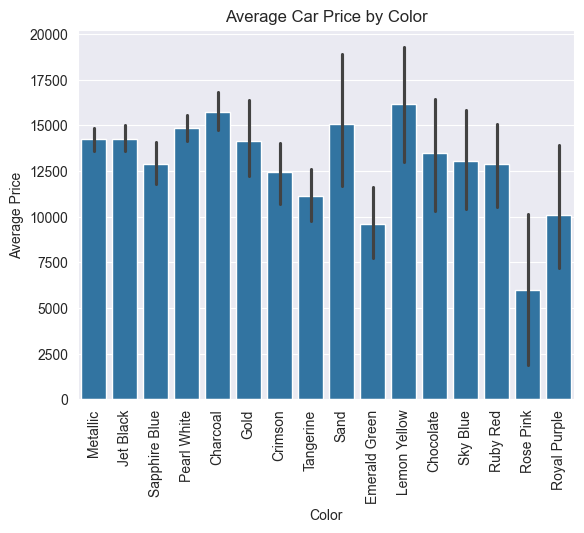

In [1719]:
df_color_price = df.dropna(subset=['color', 'price'])
sns.barplot(x='color', y='price', data=df_color_price)
sns.set_style('darkgrid')
plt.xticks(rotation=90)
plt.title('Average Car Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

### `Important Features to Keep and Fill NaNs` 
1- Brand (706 NaNs): Important for the car's valuation. Fill NaNs with a placeholder or the most common brand. \
2- VehicleModel (697 NaNs): Specific models can have different price points. Fill NaNs with a placeholder or the most common model. \
3- ManufacturingYear (695 NaNs): Newer cars typically have higher values. Fill NaNs with the median or most common year. \
4- Type (685 NaNs): Different car types (SUV, sedan, etc.) have different price ranges. Fill NaNs with a placeholder or the most common type.\
5- rating (690 NaNs): User ratings might affect the price. Fill NaNs with the median or average rating.\
6- color (2124 NaNs): While color can affect price, it's not as critical as other features. Fill NaNs with a placeholder or the most common color.\
7- fuel (696 NaNs): Fuel type can significantly affect car price. Fill NaNs with the most common fuel type.\
8- type of gear (692 NaNs): Automatic vs. manual transmission can impact the price. Fill NaNs with the most common type of gear.

### `Features with No NaNs` 
1- ID: This is an identifier and not useful for prediction. Can be dropped.\
2- Duty: Keep if it impacts car price in your context.\
3- CylinderCount: Important as it affects car performance and price.\
4- capacity: Important for car's engine size.\
5- Odometer: Very important as mileage impacts car value.\
6- #airbags: Safety features can affect car price.\
7- price: This is the target variable.


#### `Summary`
1. No duplicates in data
2. There are Missing values in: Brand , VehicleModel , ManufacturingYear , Type , rating , color , fuel , type of gear       
3. ID column is not important and needs to be dropped
4. color column has alot of missing values and doesn't affect the price significantly so it also needs to be dropped
5. There are some categorical features need to be converted into numerical(ManufacturingYear-CylinderCount-Odometer-#airbags)

### Cleaning

In [1720]:
dd = df.copy()

#### `ID`

In [1721]:
dd = dd.drop(columns=['ID'])

#### `Brand`

In [1722]:
dd[['Brand']].head()

,Brand
0,NaN
1,I love TOYOTA
2,hyundai
3,opel
4,subaru


In [1723]:
dd['Brand'].unique()

array([nan, 'I love TOYOTA', 'hyundai', 'opel', 'subaru', 'VOLKSWAGEN',
       'FORD', 'Bmw', 'jaguar', 'I love HONDA', 'mercedes-benz',
       'I love FORD', 'honda', 'HYUNDAI', 'NISSAN', 'toyota',
       'volkswagen', 'lexus', 'ford', 'SSANGYONG', 'HONDA', 'Hyundai',
       'Toyota', 'BMW', 'MERCEDES-BENZ is the best',
       'I love MERCEDES-BENZ', 'SSANGYONG is the best', 'I love SUBARU',
       'ssangyong', 'TOYOTA is the best', 'nissan', 'kia', 'DAEWOO',
       'SUBARU is the best', 'TOYOTA', 'bmw', 'AUDI', 'CHEVROLET', 'jeep',
       'SUBARU', 'MERCEDES-BENZ', 'Mercedes-Benz', 'I love BMW', 'LEXUS',
       'I love HYUNDAI', 'NISSAN is the best', 'Opel', 'PORSCHE', 'MAZDA',
       'I love NISSAN', 'HYUNDAI is the best', 'chevrolet', 'mitsubishi',
       'I love KIA', 'Chevrolet', 'mazda', 'KIA', 'BMW is the best',
       'gmc', 'I love LEXUS', 'MITSUBISHI', 'I love MITSUBISHI', 'skoda',
       'Lexus', 'Volkswagen', 'SUZUKI', 'Ford', 'JEEP', 'OPEL', 'Honda',
       'I love VOLKSW

In [1724]:
def clean_brand(brand):
    if pd.isna(brand):
        return np.nan
    brand = brand.lower()
    for prefix in ["i love ", " is the best"]:
        brand = brand.replace(prefix, "")
    return brand.strip()

dd['Brand'] = dd['Brand'].apply(clean_brand)

In [1725]:
dd['Brand'].unique()

array([nan, 'toyota', 'hyundai', 'opel', 'subaru', 'volkswagen', 'ford',
       'bmw', 'jaguar', 'honda', 'mercedes-benz', 'nissan', 'lexus',
       'ssangyong', 'kia', 'daewoo', 'audi', 'chevrolet', 'jeep',
       'porsche', 'mazda', 'mitsubishi', 'gmc', 'skoda', 'suzuki', 'fiat',
       'peugeot', 'dodge', 'mini', 'vaz', 'gaz', 'cadillac', 'uaz',
       'seat', 'rover', 'chrysler', 'land rover', 'infiniti', 'სხვა',
       'alfa romeo', 'renault', 'greatwall', 'buick', 'volvo', 'lincoln',
       'isuzu', 'scion', 'rolls-royce', 'citroen', 'pontiac', 'acura',
       'daihatsu', 'moskvich', 'mercury', 'maserati'], dtype=object)

In [1726]:
dd['Brand'] = dd['Brand'].str.replace('სხვა','other')
dd['Brand'] = dd['Brand'].str.replace('rover','land rover')
dd['Brand'] = dd['Brand'].fillna(dd['Brand'].mode()[0])

In [1727]:
dd['Brand'].unique()

array(['toyota', 'hyundai', 'opel', 'subaru', 'volkswagen', 'ford', 'bmw',
       'jaguar', 'honda', 'mercedes-benz', 'nissan', 'lexus', 'ssangyong',
       'kia', 'daewoo', 'audi', 'chevrolet', 'jeep', 'porsche', 'mazda',
       'mitsubishi', 'gmc', 'skoda', 'suzuki', 'fiat', 'peugeot', 'dodge',
       'mini', 'vaz', 'gaz', 'cadillac', 'uaz', 'seat', 'land rover',
       'chrysler', 'land land rover', 'infiniti', 'other', 'alfa romeo',
       'renault', 'greatwall', 'buick', 'volvo', 'lincoln', 'isuzu',
       'scion', 'rolls-royce', 'citroen', 'pontiac', 'acura', 'daihatsu',
       'moskvich', 'mercury', 'maserati'], dtype=object)

In [1728]:
dd['Brand'].isna().sum()

np.int64(0)

#### `VehicleModel`

In [1729]:
dd['VehicleModel']

0       I have the fastest model ever.. yes you got it...
1                                                     NaN
2                                                      H1
3                                                   Corsa
4                                          I own Outback.
                              ...                        
6995                                              ORLANDO
6996                                            I own X5.
6997                                                  NaN
6998                                                Camry
6999                                               Sonata
Name: VehicleModel, Length: 7000, dtype: object

In [1730]:
pd.DataFrame(dd['VehicleModel'].unique()).head()

,0
0,I have the fastest model ever.. yes you got it...
1,NaN
2,H1
3,Corsa
4,I own Outback.


In [1731]:
def clean_model(model):
    if pd.isna(model):
        return np.nan
    model = model.lower()
    for prefix in ["i have the fastest model ever.. yes you got it right it's ","i own ","my model which is "," is the best",".",]:
        model = model.replace(prefix, "")
    return model.strip()

dd['VehicleModel'] = dd['VehicleModel'].apply(clean_model)

In [1732]:
dd['VehicleModel'].isna().sum()

np.int64(697)

In [1733]:
# dd['VehicleModel'] = dd['VehicleModel'].fillna(dd['VehicleModel'].mode()[0])
dd['VehicleModel'] = dd['VehicleModel'].fillna('other')

#### `ManufacturingYear`

In [1734]:
dd['ManufacturingYear'].unique()

array(['2017', nan, '2009', '2007', '3010', '1999', '2012', '2011',
       '2014', '2015', '2006', '2105', '2013,', '2010', '2017{',
       '1-1-2003', '2016', '1998', '2018', '2008', '2015+', '2012"',
       '2013', '2111', '1-1-2020', '2005', '2017*', '2004', '2016.',
       '2015#', '1910', '2017&', '1914', '1-1-2013', '3009', '2009&',
       '2018}', '14years old', '1-1-2014', '2001', '2015`', '2112',
       '1997', '2014@', '1917', '2014+', '2013*', '1-1-2011', '1-1-2008',
       '2012,', '2003', '1-1-2007', '15years old', '1916', '1-1-2012',
       '1912', '2010~', '2020', '2002>', '2110', '2005>', '2115',
       '1-1-2005', '2009%', '2019', '10years old', '1-1-2002', '2015@',
       '3013', '1907', '2010*', '2000', '1996_', '12years old', '2011;',
       '2017_', '13years old', '3014', '2017(', '2011,', '11years old',
       '7years old', '1-1-2010', '3004', '1996|', '1913', '2014|',
       '1-1-2016', '2016[', '1900', "2009'", '1902', '2117', '1-1-2009',
       '8years old', '2

In [1735]:
dd['ManufacturingYear'] = dd['ManufacturingYear'].str.replace(r'1-1-', '', regex=True)
dd['ManufacturingYear'] = dd['ManufacturingYear'].str.replace(r'[^0-9]', '', regex=True)

In [1736]:
def clean_Year(model):
    if pd.isna(model):
        return np.nan
    elif len(model) <= 2:
        model = str(2024-int(model))
    return model

dd['ManufacturingYear'] = dd['ManufacturingYear'].apply(clean_Year)

In [1737]:
dd['ManufacturingYear'].unique()

array(['2017', nan, '2009', '2007', '3010', '1999', '2012', '2011',
       '2014', '2015', '2006', '2105', '2013', '2010', '2003', '2016',
       '1998', '2018', '2008', '2111', '2020', '2005', '2004', '1910',
       '1914', '3009', '2001', '2112', '1997', '1917', '1916', '1912',
       '2002', '2110', '2115', '2019', '3013', '1907', '2000', '1996',
       '3014', '3004', '1913', '1900', '1902', '2117', '2118', '1995',
       '2113', '3012', '1915', '1911', '2116', '2098', '1918', '2114',
       '3008', '3006', '2107', '2119', '1908', '1992', '2099', '1985',
       '1909', '3007', '2103', '1905', '1991', '1983', '3011', '2104',
       '3015', '1904', '1993', '1994', '1988', '3017', '1898', '1903',
       '3018', '2998', '3016', '1982', '2108', '2106', '3003', '1896',
       '2100', '1893', '1987', '2120', '1990', '2102', '3005', '2097',
       '1939', '1919', '2096', '2101', '2999', '1901', '3019', '1953',
       '3002', '1986', '3000', '2109', '1984', '1920', '2089', '2992',
       '3

In [1738]:
dd['ManufacturingYear'] = dd['ManufacturingYear'].astype('float')

In [1739]:
def normalize_Year(year):
    if pd.isna(year):
        return np.nan
    elif year >= 3000:
        year -= 1000
    if year >= 2900:
        year -= 1000
    if year >= 2100 :
        year -= 100
    if year > 2024:
        year = 2024
    return year
# max(dd['ManufacturingYear'].apply(normalize_Year).unique())
dd['ManufacturingYear'] = dd['ManufacturingYear'].apply(normalize_Year)

In [1740]:
dd['ManufacturingYear'].unique()

array([2017.,   nan, 2009., 2007., 2010., 1999., 2012., 2011., 2014.,
       2015., 2006., 2005., 2013., 2003., 2016., 1998., 2018., 2008.,
       2020., 2004., 1910., 1914., 2001., 1997., 1917., 1916., 1912.,
       2002., 2019., 1907., 2000., 1996., 1913., 1900., 1902., 1995.,
       1915., 1911., 2024., 1918., 1908., 1992., 1985., 1909., 1905.,
       1991., 1983., 1904., 1993., 1994., 1988., 1898., 1903., 1982.,
       1896., 1893., 1987., 1990., 1939., 1919., 1901., 1953., 1986.,
       1984., 1920., 1906., 1978., 1895.])

In [1741]:
dd['ManufacturingYear'].describe()

count    6305.000000
mean     2007.242189
std        19.226035
min      1893.000000
25%      2008.000000
50%      2012.000000
75%      2014.000000
max      2024.000000
Name: ManufacturingYear, dtype: float64

In [1742]:
dd['ManufacturingYear'].median()

np.float64(2012.0)

In [1743]:
dd['ManufacturingYear'] = dd['ManufacturingYear'].fillna(2012)

#### `Type`

In [1744]:
dd['Type'].unique()

array(['WOOW Sedan', 'Minivan3', 'MINIVAN', 'Hatchback', 'sedan', 'SEDAN',
       'Pickup3', 'jeep', 'Minivan', 'HATCHBACK', 'minivan', 'hatchback',
       'JEEP', 'microbus', nan, 'Jeep1', 'Sedan0', 'Coupe', 'Sedan3',
       'Hatchback3', 'Sedan', 'Jeep0', 'WOOW Hatchback', 'WOOW Jeep',
       'Hatchback1', 'WOOW Coupe', 'UNIVERSAL', 'Hatchback2', 'Jeep2',
       'Hatchback4', 'Sedan4', 'Sedan1', 'Jeep', 'WOOW Minivan', 'Jeep4',
       'Hatchback0', 'Goods Wagon', 'universal', 'WOOW Goods wagon',
       'MICROBUS', 'Minivan0', 'Coupe1', 'goods wagon', 'pickup', 'Jeep3',
       'Sedan2', 'coupe', 'Pickup1', 'COUPE', 'CABRIOLET', 'Universal0',
       'Microbus', 'WOOW Universal', 'Goods wagon1', 'WOOW Microbus',
       'Minivan2', 'GOODS WAGON', 'cabriolet', 'Goods wagon0', 'Coupe4',
       'Universal', 'Goods wagon2', 'Microbus4', 'Coupe3', 'Goods wagon4',
       'Limousine', 'PICKUP', 'Microbus0', 'Coupe0', 'Goods wagon3',
       'Universal3', 'Minivan1', 'Microbus3', 'Microbus1', 'Un

In [1745]:
dd['Type']=dd['Type'].str.lower()
dd['Type']=dd['Type'].str.replace(r'[^a-z]', '', regex=True)
dd['Type'].unique()

array(['woowsedan', 'minivan', 'hatchback', 'sedan', 'pickup', 'jeep',
       'microbus', nan, 'coupe', 'woowhatchback', 'woowjeep', 'woowcoupe',
       'universal', 'woowminivan', 'goodswagon', 'woowgoodswagon',
       'cabriolet', 'woowuniversal', 'woowmicrobus', 'limousine'],
      dtype=object)

In [1746]:
def clean_type(type):
    if pd.isna(type):
        return np.nan
    for word in ['good' , 'woow']:
        type = type.replace(word , '')
    return type

dd['Type'] = dd['Type'].apply(clean_type)
dd['Type'].unique()

array(['sedan', 'minivan', 'hatchback', 'pickup', 'jeep', 'microbus', nan,
       'coupe', 'universal', 'swagon', 'cabriolet', 'limousine'],
      dtype=object)

In [1747]:
dd['Type'] = dd['Type'].str.replace('swagon','goods wagon')

In [1748]:
dd['Type'].unique()

array(['sedan', 'minivan', 'hatchback', 'pickup', 'jeep', 'microbus', nan,
       'coupe', 'universal', 'goods wagon', 'cabriolet', 'limousine'],
      dtype=object)

In [1749]:
dd['Type'] = dd['Type'].fillna(dd['Type'].mode()[0])

#### `rating`

In [1750]:
dd['rating'].unique()

array([ 0.,  5.,  4., nan,  2.,  6.,  3.,  8.,  1.,  7., -1., -2., -3.,
        9., 10., -4.])

In [1751]:
dd['rating'].value_counts()

rating
 2.0     1248
 3.0     1175
 1.0      935
 4.0      925
 0.0      857
 5.0      609
 6.0      274
-1.0      108
 7.0       94
 8.0       35
-2.0       30
-3.0       11
 9.0        7
 10.0       1
-4.0        1
Name: count, dtype: int64

In [1752]:
dd['rating'].isna().sum()

np.int64(690)

In [1753]:
dd['rating'].median()

np.float64(2.0)

In [1754]:
dd['rating'] = dd['rating'].fillna(dd['rating'].median())

#### `color`

In [1755]:
dd['color'].unique()

array([nan, 'Metallic', 'Jet Black', 'Sapphire Blue', 'Pearl White',
       'Charcoal', 'Gold', 'Crimson', 'Tangerine', 'Sand',
       'Emerald Green', 'Lemon Yellow', 'Chocolate', 'Sky Blue',
       'Ruby Red', 'Rose Pink', 'Royal Purple'], dtype=object)

In [1756]:
dd['color'] = dd['color'].fillna(dd['color'].mode()[0])

In [1757]:
dd = dd.drop(columns=['color'])

#### `Duty`

In [1758]:
dd['Duty'].unique()

array(['I had to pay a substantial $1249 levy on my new car purchase.',
       '-', '1185$', ..., '2909$',
       'The car levy amounted is 893 per vehicle.', '965'], dtype=object)

In [1759]:
dd['Duty']=dd['Duty'].str.replace(r'[^0-9]', '', regex=True)
dd['Duty'] = dd['Duty'].apply(lambda x: '0' if x == '' else x)
duty_lst = dd['Duty'].unique().tolist()
print(duty_lst)

['1249', '0', '1185', '836', '8526', '10777', '1104', '640', '10891', '603', '880', '893', '503', '448', '779', '707', '781', '460', '691', '891', '831', '1099', '1829', '1750', '870', '1055', '790', '1327', '1024', '777', '629', '919', '8810', '586', '9235', '595', '1018', '10394', '1202', '639', '8945', '583', '761', '988', '1058', '10503', '1624', '1172', '638', '1399', '642', '1076', '9606', '419', '765', '4321', '1246', '502', '753', '1077', '382', '843', '730', '2151', '1850', '645', '1282', '1053', '1324', '501', '1030', '784', '259', '7545', '11024', '9498', '915', '1481', '333', '2297', '810', '585', '584', '3156', '2108', '1234', '9355', '425', '1079', '1451', '441', '1673', '1811', '531', '986', '308', '1357', '521', '2455', '1051', '10765', '862', '463', '11325', '289', '1190', '746', '353', '528', '1091', '1917', '473', '574', '10753', '1080', '1266', '934', '8828', '1275', '9166', '1578', '966', '1514', '1714', '394', '697', '11324', '475', '607', '10473', '474', '530', '

In [1760]:
dd['Duty']=dd['Duty'].astype(int)

In [1761]:
dd['Duty'].isna().sum()

np.int64(0)

#### `fuel`

In [1762]:
dd['fuel'].unique()

array(['Gas', 'Dies', nan, 'Electric Hybrid', 'other', 'Natural Gas',
       'hyb', 'others'], dtype=object)

In [1763]:
dd['fuel']=dd['fuel'].str.replace('others','other')
dd['fuel']=dd['fuel'].str.replace('hyb','Electric Hybrid')

In [1764]:
dd['fuel'] = dd['fuel'].fillna(dd['fuel'].mode()[0])


#### `CylinderCount`

In [1765]:
dd['CylinderCount'].unique()

array(['4.0', '4.0 cyl', '8.0', '8.0 cyl', '6.0 cyl', '6.0', '14.0', '0',
       '5.0', '16.0', '18.0', '3.0', '3.0 cyl', '15.0', '10.0', '11.0',
       '2.0 cyl', '5.0 cyl', '9.0', '10.0 cyl', '1.0', '12.0 cyl', '2.0',
       '16.0 cyl', '13.0', '1.0 cyl', '12.0', '7.0'], dtype=object)

In [1766]:
dd['CylinderCount'] = dd['CylinderCount'].str.replace(r'[^0-9.]', '', regex=True)

In [1767]:
dd['CylinderCount'] = dd['CylinderCount'].astype(float).astype(int)

In [1768]:
dd['CylinderCount'].unique()

array([ 4,  8,  6, 14,  0,  5, 16, 18,  3, 15, 10, 11,  2,  9,  1, 12, 13,
        7])

#### `type of gear`

In [1769]:
dd['type of gear'] = dd['type of gear'].str.lower()

In [1770]:
dd['type of gear'].unique()

array(['r', 'auto', nan, 'manual', 'others', 'gear'], dtype=object)

In [1771]:
dd['type of gear'] = dd['type of gear'].fillna('others')

In [1772]:
dd['type of gear'].unique()

array(['r', 'auto', 'others', 'manual', 'gear'], dtype=object)

#### `capacity`

In [1773]:
dd['capacity'].unique()

array(['2.5', '2.4', '0', '2', '5', '3', '1.3', '1.5', '1.6', '1.8',
       '3.5', '2.7 Turbo', '1.8 Turbo', '2.7', '2.5 Turbo', '3.3', '1.7',
       '2.2', '2.2 Turbo', '4', '1.4', '4.8', '1.2', '2.3', '1.6 Turbo',
       '4.7', '2.0 Turbo', '2.8 Turbo', '3.2', '5.5', '6.2', '4.6', '3.7',
       '1', '3.0 Turbo', '1.9 Turbo', '2.4 Turbo', '5.0 Turbo', '3.6',
       '4.4', '1.4 Turbo', '2.6', '3.2 Turbo', '0.6 Turbo', '1.5 Turbo',
       '6.3', '3.8', '5.7', '1.9', '4.5', '5.9', '0.3', '5.5 Turbo',
       '4.5 Turbo', '4.2', '3.5 Turbo', '0.4', '0.1', '0.2', '0.8',
       '4.4 Turbo', '2.3 Turbo', '4.7 Turbo', '2.9 Turbo', '1.7 Turbo',
       '6.7', '2.1 Turbo', '2.8', '2.9', '0.7', '2.1', '1.3 Turbo', '5.4',
       '5.4 Turbo', '3.4', '5.3', '4.3', '0.9', '0.8 Turbo', '0.6',
       '3.6 Turbo', '1.0 Turbo', '5.6', '5.2', '1.1', '4.8 Turbo', '0.5'],
      dtype=object)

In [1774]:
dd['capacity'] = dd['capacity'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
dd['capacity'].unique()

array([2.5, 2.4, 0. , 2. , 5. , 3. , 1.3, 1.5, 1.6, 1.8, 3.5, 2.7, 3.3,
       1.7, 2.2, 4. , 1.4, 4.8, 1.2, 2.3, 4.7, 2.8, 3.2, 5.5, 6.2, 4.6,
       3.7, 1. , 1.9, 3.6, 4.4, 2.6, 0.6, 6.3, 3.8, 5.7, 4.5, 5.9, 0.3,
       4.2, 0.4, 0.1, 0.2, 0.8, 2.9, 6.7, 2.1, 0.7, 5.4, 3.4, 5.3, 4.3,
       0.9, 5.6, 5.2, 1.1, 0.5])

#### `Odometer`

In [1775]:
dd['Odometer'].unique()

array(['75492 KM', '220000 KM', 'TOTAL 50653 km', ..., '156802  kilo',
       '314373 KM', '131627'], dtype=object)

In [1776]:
dd['Odometer'] = dd['Odometer'].str.replace(r'[^0-9]', '', regex=True).astype(int)

In [1777]:
dd = dd.drop(columns=['#airbags'])

In [1778]:
test_data = test_data.drop(columns=['ID'])
test_data['Brand'] = test_data['Brand'].apply(clean_brand)
test_data['Brand'] = test_data['Brand'].str.replace('სხვა','other')
test_data['Brand'] = test_data['Brand'].str.replace('rover','land rover')
test_data['Brand'] = test_data['Brand'].fillna(dd['Brand'].mode()[0])
test_data['VehicleModel'] = test_data['VehicleModel'].apply(clean_model)
test_data['VehicleModel'] = test_data['VehicleModel'].fillna('other')
test_data['ManufacturingYear'] = test_data['ManufacturingYear'].str.replace(r'1-1-', '', regex=True)
test_data['ManufacturingYear'] = test_data['ManufacturingYear'].str.replace(r'[^0-9]', '', regex=True)
test_data['ManufacturingYear'] = test_data['ManufacturingYear'].apply(clean_Year)
test_data['ManufacturingYear'] = test_data['ManufacturingYear'].astype('float')
test_data['ManufacturingYear'] = test_data['ManufacturingYear'].apply(normalize_Year)
test_data['ManufacturingYear'] = test_data['ManufacturingYear'].fillna(2012)
test_data['Type']=test_data['Type'].str.lower()
test_data['Type']=test_data['Type'].str.replace(r'[^a-z]', '', regex=True)
test_data['Type'].unique()
test_data['Type'] = test_data['Type'].apply(clean_type)
test_data['Type'] = test_data['Type'].str.replace('swagon','goods wagon')
test_data['Type'] = test_data['Type'].fillna(test_data['Type'].mode()[0])
test_data['rating'] = test_data['rating'].fillna(test_data['rating'].median())
test_data['color'] = test_data['color'].fillna(test_data['color'].mode()[0])
test_data['Duty']=test_data['Duty'].str.replace(r'[^0-9]', '', regex=True)
test_data['Duty'] = test_data['Duty'].apply(lambda x: '0' if x == '' else x)
test_data['Duty']=test_data['Duty'].astype(int)
test_data['fuel']=test_data['fuel'].str.replace('others','other')
test_data['fuel']=test_data['fuel'].str.replace('hyb','Electric Hybrid')
test_data['fuel'] = test_data['fuel'].fillna(test_data['fuel'].mode()[0])
test_data['CylinderCount'] = test_data['CylinderCount'].str.replace(r'[^0-9.]', '', regex=True)
test_data['CylinderCount'] = test_data['CylinderCount'].astype(float).astype(int)
test_data['type of gear'] = test_data['type of gear'].str.lower()
test_data['type of gear'] = test_data['type of gear'].fillna('others')
test_data['capacity'] = test_data['capacity'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
test_data['Odometer'] = test_data['Odometer'].str.replace(r'[^0-9]', '', regex=True).astype(int)
test_data = test_data.drop(columns=['#airbags'])
test_data = test_data.drop(columns=['color'])

In [1779]:
dd

,Brand,VehicleModel,ManufacturingYear,Type,rating,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,price
0,toyota,mazda 6 touring,2017.0,sedan,0.0,1249,Gas,4,r,2.5,75492,21012
1,toyota,other,2012.0,minivan,5.0,0,Gas,4,r,2.4,220000,11917
2,hyundai,h1,2009.0,minivan,0.0,1185,Dies,4,r,2.5,50653,22433
3,opel,corsa,2012.0,hatchback,5.0,0,Gas,4,auto,0.0,230000,5645
4,subaru,outback,2007.0,hatchback,4.0,0,Gas,4,others,2.5,131000,10976
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,chevrolet,orlando,2012.0,jeep,2.0,642,Dies,0,gear,2.0,156802,16894
6996,bmw,x5,2014.0,jeep,2.0,915,Dies,6,auto,3.0,110715,16621
6997,toyota,other,2012.0,sedan,0.0,781,Electric Hybrid,4,auto,2.5,314373,392
6998,toyota,camry,2012.0,sedan,1.0,781,Gas,14,r,2.5,80000,17249


In [1780]:
pd.set_option('future.no_silent_downcasting', True)

In [1781]:
dt = dd.copy()
test_data_t = test_data.copy()

In [1782]:
dt['Brand'] = dt['Brand'].replace(dt['Brand'].unique(),range(1,len(dt['Brand'].unique())+1))
dt['VehicleModel'] = dt['VehicleModel'].replace(dt['VehicleModel'].unique(),range(1,len(dt['VehicleModel'].unique())+1))
dt['Type'] = dt['Type'].replace(dt['Type'].unique(),range(1,len(dt['Type'].unique())+1))
# dt['color'] = dt['color'].replace(dt['color'].unique(),range(1,len(dt['color'].unique())+1))
dt['fuel'] = dt['fuel'].replace(dt['fuel'].unique(),range(1,len(dt['fuel'].unique())+1))
dt['type of gear'] = dt['type of gear'].replace(dt['type of gear'].unique(),range(1,len(dt['type of gear'].unique())+1))

In [1783]:
test_data_t['Brand'] = test_data_t['Brand'].replace(test_data_t['Brand'].unique(),range(1,len(test_data_t['Brand'].unique())+1))
test_data_t['VehicleModel'] = test_data_t['VehicleModel'].replace(test_data_t['VehicleModel'].unique(),range(1,len(test_data_t['VehicleModel'].unique())+1))
test_data_t['Type'] = test_data_t['Type'].replace(test_data_t['Type'].unique(),range(1,len(test_data_t['Type'].unique())+1))
# test_data_t['color'] = test_data_t['color'].replace(test_data_t['color'].unique(),range(1,len(test_data_t['color'].unique())+1))
test_data_t['fuel'] = test_data_t['fuel'].replace(test_data_t['fuel'].unique(),range(1,len(test_data_t['fuel'].unique())+1))
test_data_t['type of gear'] = test_data_t['type of gear'].replace(test_data_t['type of gear'].unique(),range(1,len(test_data_t['type of gear'].unique())+1))

In [1784]:
dt


,Brand,VehicleModel,ManufacturingYear,Type,rating,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,price
0,1,1,2017.0,1,0.0,1249,1,4,1,2.5,75492,21012
1,1,2,2012.0,2,5.0,0,1,4,1,2.4,220000,11917
2,2,3,2009.0,2,0.0,1185,2,4,1,2.5,50653,22433
3,3,4,2012.0,3,5.0,0,1,4,2,0.0,230000,5645
4,4,5,2007.0,3,4.0,0,1,4,3,2.5,131000,10976
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,17,78,2012.0,5,2.0,642,2,0,5,2.0,156802,16894
6996,7,52,2014.0,5,2.0,915,2,6,2,3.0,110715,16621
6997,1,2,2012.0,1,0.0,781,3,4,2,2.5,314373,392
6998,1,25,2012.0,1,1.0,781,1,14,1,2.5,80000,17249


In [1785]:
test_data_t

,Brand,VehicleModel,ManufacturingYear,Type,rating,Duty,fuel,CylinderCount,type of gear,capacity,Odometer
0,1,1,2012.0,1,4.0,1017,1,4,1,2.0,1600
1,2,2,2012.0,1,1.0,0,2,4,1,1.5,141302
2,3,3,2006.0,2,1.0,0,3,4,2,1.9,136000
3,4,4,2016.0,1,3.0,2188,1,4,3,1.8,78000
4,5,1,2012.0,1,8.0,1017,1,4,4,2.0,1600
...,...,...,...,...,...,...,...,...,...,...,...
2995,1,29,2001.0,1,1.0,0,1,6,1,3.2,2000
2996,8,270,2005.0,3,2.0,0,1,4,5,0.0,180000
2997,20,60,2011.0,8,4.0,0,1,4,4,1.3,148000
2998,9,37,2017.0,1,3.0,0,1,14,1,1.4,50000


## `Modelling`

In [1786]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [1787]:
ridge = RidgeCV()                       
lasso = LassoCV()
dtree = DecisionTreeRegressor(max_depth = 4)
knn = KNeighborsRegressor(n_neighbors= 9)
rf = RandomForestRegressor(max_depth = 6, n_estimators = 90, random_state = 73)
gbr = GradientBoostingRegressor(max_depth = 3, n_estimators = 50, random_state = 37)
lr = LinearRegression()

In [1788]:
from sklearn.model_selection import cross_val_score

In [1789]:
input_data = dt.drop(columns=['price'])
output_data = dt['price']

In [1790]:
metric = 'neg_mean_absolute_error'

In [1791]:
print("RidgeCV score = ", cross_val_score(ridge, input_data, output_data, cv=5, scoring = metric).mean()*-1)
print("LassoCV score = ", cross_val_score(lasso, input_data, output_data, cv=5, scoring = metric).mean()*-1)
print("DecisionTreeRegressor score = ", cross_val_score(dtree, input_data, output_data, cv=5, scoring = metric).mean()*-1)
print("KNeighborsRegressor score = ", cross_val_score(knn, input_data, output_data, cv=5, scoring = metric).mean()*-1)
print("RandomForestRegressor score = ", cross_val_score(rf, input_data, output_data, cv=5, scoring = metric).mean()*-1)
print("GradientBoostingRegressor score = ", cross_val_score(gbr, input_data, output_data, cv=5, scoring = metric).mean()*-1)
print("Linear Regression score = ", cross_val_score(lr, input_data, output_data, cv=5, scoring = metric).mean()*-1)

RidgeCV score =  12816.822830085668
LassoCV score =  9266.153662314395
DecisionTreeRegressor score =  8083.788431003812
KNeighborsRegressor score =  8952.072158730158
RandomForestRegressor score =  7280.390749902382
GradientBoostingRegressor score =  7271.646783145445
Linear Regression score =  9089.020970206093


In [1792]:
model = LinearRegression()

In [1793]:
model.fit(input_data , output_data)

LinearRegression()

In [1794]:
sample = pd.read_csv('sample_submission.csv')

In [1795]:
sample['Price'] = pd.DataFrame(model.predict(test_data_t),columns=['Price'])

In [1796]:
sample

,ID,Price
0,5634,15608.287209
1,16689,14453.175377
2,13457,13401.283536
3,4555,14553.653132
4,9726,14096.730722
...,...,...
2995,14959,14876.126691
2996,10125,14193.375232
2997,9275,17526.391903
2998,1812,14444.917776


In [1797]:
sample.to_csv('submission1.csv')